In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
#    plt.rcParams["figure.figsize"] = (15,15)
#    plt.figure(figsize=(15,15))
    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    plt.show()

In [12]:
def fix_zip(series):
      return series.astype(str).str.replace('[^\w\s]', '').str.zfill(5)

In [13]:
train_df = pd.read_csv('train_df.csv')
test_df = pd.read_csv('test_df.csv')

train_df['Yr_Mo']= pd.to_datetime(train_df['Yr_Mo'])
test_df['Yr_Mo']= pd.to_datetime(test_df['Yr_Mo'])

train_df = pd.pivot_table(train_df,index=train_df.Yr_Mo)
test_df = pd.pivot_table(test_df,index=test_df.Yr_Mo)

In [21]:
preds_df = pd.read_csv('var_pred_df.csv')
acts_df = pd.read_csv('var_act_df.csv')

scores_df = pd.read_csv('var_scores_df.csv')

In [16]:
preds_df.head()
acts_df.head()

,Yr_Mo,01604,01702,01752,01851,01852,02109,02111,02113,02114,...,98402,98403,98405,98406,98422,98466,98498,98661,98683,99207
0,2020-01-01,1447.0,2000.0,1780.0,1514.0,1635.0,3069.0,3788.0,2505.0,2833.0,...,1433.0,1359.0,1449.0,1530.0,1722.0,1578.0,1399.0,1348.0,1412.0,1291.0
1,2020-02-01,1453.0,2005.0,1780.0,1517.0,1639.0,3052.0,3757.0,2488.0,2813.0,...,1440.0,1366.0,1457.0,1541.0,1726.0,1579.0,1405.0,1351.0,1415.0,1297.0
2,2020-03-01,1459.0,2010.0,1779.0,1520.0,1642.0,3035.0,3726.0,2472.0,2792.0,...,1448.0,1374.0,1465.0,1551.0,1730.0,1581.0,1412.0,1355.0,1418.0,1303.0
3,2020-04-01,1465.0,2014.0,1778.0,1524.0,1646.0,3018.0,3695.0,2455.0,2771.0,...,1456.0,1381.0,1474.0,1562.0,1734.0,1582.0,1418.0,1358.0,1421.0,1309.0
4,2020-05-01,1471.0,2018.0,1781.0,1525.0,1651.0,2993.0,3653.0,2431.0,2740.0,...,1462.0,1388.0,1484.0,1572.0,1733.0,1591.0,1425.0,1364.0,1426.0,1320.0


In [27]:
scores_df.sort_values(by='RMSE',ascending=False, inplace=True)

In [35]:
scores_df.tail()

,Unnamed: 0,ZIP,MSE,RMSE,R2
332,332,23223,9.760742,3.124219,0.969842
121,121,10458,8.314598,2.883504,0.992373
1726,1726,98270,6.972473,2.640544,0.999115
869,869,55117,6.752203,2.598500,0.992970
903,903,60074,4.910415,2.215946,0.985333


C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\pengu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


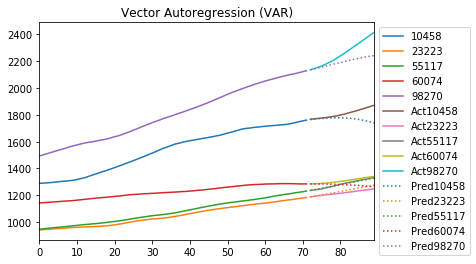

In [31]:
# LOW RMSE
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

train_small = train_df[['23223', '10458', '98270', '55117', '60074']]
test_small = test_df[['23223', '10458', '98270', '55117', '60074']]

def VAR_model(train,test):
    # fit model
    model = VAR(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(model_fit.y, steps=len(test))
    res=pd.DataFrame({**dict(zip(['Pred'+str(test.columns[i])for i in range(len(test.columns))],
                                 [[x[i] for x in yhat] for i in range(len(yhat[0]))])),
                      **test.rename(columns={col_:'Act'+str(col_) for col_ in test.columns}).to_dict('series')})

    return res

# df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
# df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VAR_model(train_small, test_small)
show_graph(train_small, df_ret, "Vector Autoregression (VAR)")

C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\pengu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


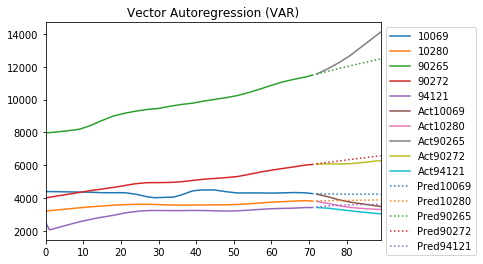

In [33]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

train_small = train_df[['90272', '10069', '10280', '90265', '94121']]
test_small = test_df[['90272', '10069', '10280', '90265', '94121']]

def VAR_model(train,test):
    # fit model
    model = VAR(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(model_fit.y, steps=len(test))
    res=pd.DataFrame({**dict(zip(['Pred'+str(test.columns[i])for i in range(len(test.columns))],
                                 [[x[i] for x in yhat] for i in range(len(yhat[0]))])),
                      **test.rename(columns={col_:'Act'+str(col_) for col_ in test.columns}).to_dict('series')})

    return res

# df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
# df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VAR_model(train_small, test_small)
show_graph(train_small, df_ret, "Vector Autoregression (VAR)")

In [34]:
scores_df.head()

,Unnamed: 0,ZIP,MSE,RMSE,R2
1384,1384,90272,887285.070736,941.958105,-194.803967
117,117,10069,543433.510873,737.179429,-8.952774
120,120,10280,523694.218037,723.667201,-19.823708
1382,1382,90265,427717.908281,654.001459,0.318683
1588,1588,94121,415071.319615,644.260289,-25.997045


In [37]:
zips = ['37138','45324','53212','85712','37066','94103','94107','94105','94301','90265']
low_zips = ['23223', '10458', '98270', '55117', '60074']
high_zips = ['90272', '10069', '10280', '90265', '94121']

C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\pengu\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py:34: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)
C:\Users\pengu\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


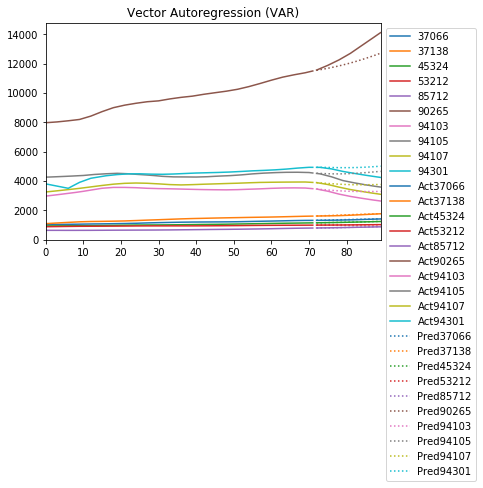

In [38]:
from statsmodels.tsa.vector_ar.var_model import VAR
from random import random

train_small = train_df[zips]
test_small = test_df[zips]

def VAR_model(train,test):
    # fit model
    model = VAR(train)
    model_fit = model.fit()
    # make prediction
    yhat = model_fit.forecast(model_fit.y, steps=len(test))
    res=pd.DataFrame({**dict(zip(['Pred'+str(test.columns[i])for i in range(len(test.columns))],
                                 [[x[i] for x in yhat] for i in range(len(yhat[0]))])),
                      **test.rename(columns={col_:'Act'+str(col_) for col_ in test.columns}).to_dict('series')})

    return res

# df_train = pd.DataFrame({'Act1':[x + random()*10 for x in range(0, 100)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
# df_test = pd.DataFrame({'Act1':[x + random()*10 for x in range(101, 201)],
#                          'Act2':50+np.sin(np.linspace(0, 2*np.pi, 100))*50})
df_ret = VAR_model(train_small, test_small)
show_graph(train_small, df_ret, "Vector Autoregression (VAR)")